150
150


ValueError: 'c' argument has 150 elements, which is not acceptable for use with 'x' with size 150, 'y' with size 150.

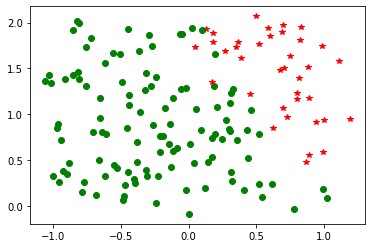

In [8]:
# 逻辑回归（判断‘是’与‘否’的关系）
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 声明数据和标签
data=[]
label=[]
np.random.seed(0)
# 随机产生训练集
for i in range(150):
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(0,2)
    if x1*2+x2<=2:
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])
        label.append(0)
        plt.plot(data[i][0],data[i][1],'go')
    else:
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])
        label.append(1)
        plt.plot(data[i][0],data[i][1],'r*')
# 绘制图像
data=np.hstack(data).reshape(-1,2)
label=np.hstack(label).reshape(-1,1)
plt.scatter(data[:,0],data[:,1],c=label,edgecolors="white")
plt.show()